In [10]:
# Data processing
import pandas as pd
import numpy as np

# Modeling
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline


import sys  
sys.path.insert(0, '/Users/johanneswidera/Uni/bachelorarbeit/Code/models/')

from Sentiment.pipeline.helper import read_imdb_split,download_data





In [13]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("../../FineTunedBERT/Sentiment/24060142")

# Load model
loaded_model = AutoModelForSequenceClassification.from_pretrained("../../FineTunedBERT/Sentiment/24060142")

In [22]:
model = pipeline('sentiment-analysis', model=loaded_model, tokenizer=tokenizer, max_length=512, truncation=True ) 

# Test

## ohne max_length tritt fehler auf
Der Fehler scheint nicht direkt in dem von Ihnen bereitgestellten Code aufzutreten. Allerdings ist es möglich, dass das Problem mit der Größe der Eingabesequenzen in corpus_test zusammenhängt. Da das Modell, das Sie verwenden, auf einer maximalen Sequenzlänge von 512 trainiert wurde, sollten Sie sicherstellen, dass Ihre Eingabesequenzen auf diese Länge beschränkt sind.

### ist das nicht bad practice wenn reviews über 512 token lang sind?

Ja, das ist richtig. Das Abschneiden von Texten, die länger als 512 Token sind, kann zu Informationsverlust führen und möglicherweise die Genauigkeit Ihrer Sentiment-Analyse beeinträchtigen. Um dieses Problem zu umgehen, können Sie eine der folgenden Methoden anwenden:

  1. Text in kleinere Abschnitte aufteilen: Teilen Sie den Text in Abschnitte mit einer Länge von höchstens 512 Token auf und führen Sie die Sentiment-Analyse für jeden Abschnitt durch. Anschließend können Sie die Ergebnisse aggregieren, um das Gesamtsentiment des gesamten Textes zu bestimmen.
  2. Längere Modelle verwenden: Sie können Modelle wie Longformer oder BigBird verwenden, die für längere Textsequenzen entwickelt wurden. Diese Modelle können Eingaben mit einer Länge von mehr als 512 Token verarbeiten, ohne dass eine Trunkierung erforderlich ist. Beachten Sie jedoch, dass diese Modelle in der Regel rechenintensiver sind und längere Verarbeitungszeiten erfordern.
  3. Text komprimieren: Versuchen Sie, den Text zu komprimieren, indem Sie irrelevante Informationen und redundante Wörter entfernen, um die Token-Anzahl zu reduzieren. Dies kann jedoch schwierig sein, da es das Risiko birgt, wichtige Informationen zu verlieren und den Kontext des Textes zu verändern.

https://stackoverflow.com/questions/58636587/how-to-use-bert-for-long-text-classification

## 2. Load Data

Load data to analyze with SHAP

In [15]:
download_data()
corpus_train, y_train = read_imdb_split('../data/aclImdb/train')
corpus_test, y_test = read_imdb_split('../data/aclImdb/test')

/Users/johanneswidera/Uni/bachelorarbeit/Code/models/Sentiment/pipeline/helper.py:38: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


# 3. Evaluate Model Again

In [36]:
N_SAMPLES =1000
predictions = model.predict(corpus_test)

In [52]:
model.predict(corpus_test[:2])

[{'label': 'LABEL_1', 'score': 0.9973391890525818},
 {'label': 'LABEL_1', 'score': 0.9945743680000305}]

In [37]:
predicted_labels = [prediction['label'] for prediction in predictions]
label_mapping = {"LABEL_1": 1, "LABEL_0": 0}
predicted_labels_int = [label_mapping[label] for label in predicted_labels]

In [38]:
from datasets import load_metric

metric = load_metric('accuracy')
metric.compute(predictions=predicted_labels_int, references=y_test[:N_SAMPLES])

{'accuracy': 0.914}

In [40]:
# Playing around with the masker
import shap

masker = shap.maskers.Text(tokenizer=r"\W+")
explainer = shap.Explainer(model, masker=masker)
shap_values = explainer(corpus_test[:10])


Partition explainer:  10%|█         | 1/10 [00:00<?, ?it/s]





Partition explainer:  30%|███       | 3/10 [00:23<00:41,  5.89s/it]










Partition explainer:  40%|████      | 4/10 [00:37<00:56,  9.36s/it]




Partition explainer:  50%|█████     | 5/10 [00:48<00:50, 10.08s/it]




Partition explainer:  60%|██████    | 6/10 [01:00<00:42, 10.51s/it]





Partition explainer:  70%|███████   | 7/10 [01:11<00:32, 10.97s/it]




Partition explainer:  80%|████████  | 8/10 [01:23<00:22, 11.12s/it]




Partition explainer:  90%|█████████ | 9/10 [01:35<00:11, 11.28s/it]







Partition explainer: 100%|██████████| 10/10 [01:47<00:00, 11.74s/it]






Partition explainer: 11it [01:59, 11.97s/it]                        


# Global Explanation



Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


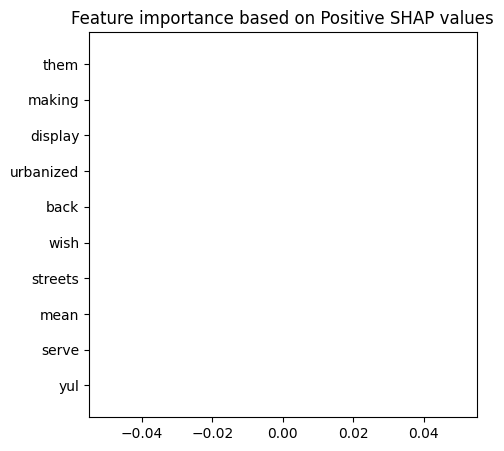

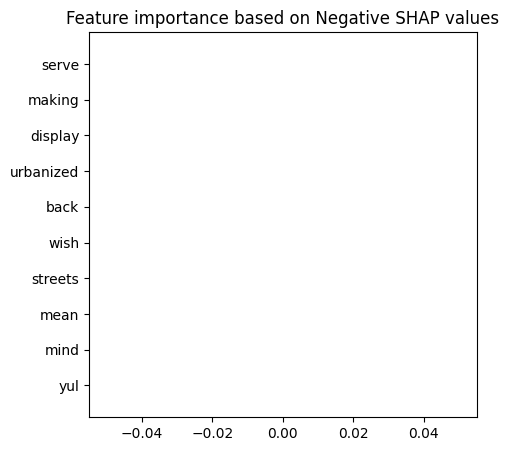

In [42]:
from custom_shap_explainer.custom_global import custom_global_explanation
from custom_shap_explainer.signal_words import highlight_signal_words

custom_global_explanation(shap_values[:,:,'LABEL_1'])

In [46]:
highlight_signal_words(shap_values[0, : , 'LABEL_1'])

In [47]:
highlight_signal_words(shap_values[1, : , 'LABEL_1'])

In [48]:
highlight_signal_words(shap_values[2, : , 'LABEL_1'])

In [49]:
highlight_signal_words(shap_values[3, : , 'LABEL_1'])

(10, None, 2)